# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

# Описание проекта

Данные находятся в трёх файлах:
 - `gold_recovery_train_new.csv` — обучающая выборка;
 - `gold_recovery_test_new.csv` — тестовая выборка;
 - `gold_recovery_full_new.csv` — исходные данные.
 
 
Данные индексируются датой и временем получения информации (признак `date`). Соседние по времени параметры часто похожи.


Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков.
Исходный датасет содержит обучающую и тестовую выборки со всеми признаками.


В вашем распоряжении сырые данные: их просто выгрузили из хранилища. 

# Описание данных

**Технологический процесс**

- Rougher feed — исходное сырье
- Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant
  
  - Xanthate **— ксантогенат (промотер, или активатор флотации);
  - Sulphate — сульфат (на данном производстве сульфид натрия);
  - Depressant — депрессант (силикат натрия).
- Rougher process (англ. «грубый процесс») — флотация
- Rougher tails — отвальные хвосты
- Float banks — флотационная установка
- Cleaner process — очистка
- Rougher Au — черновой концентрат золота
- Final Au — финальный концентрат золота

**Параметры этапов**

- air amount — объём воздуха
- fluid levels — уровень жидкости
- feed size — размер гранул сырья
- feed rate — скорость подачи

# Наименование признаков

Наименование признаков должно быть такое:

`[этап].[тип_параметра].[название_параметра]`

Пример: `rougher.input.feed_ag`

Возможные значения для блока `[этап]`:
- rougher — флотация
- primary_cleaner — первичная очистка
- secondary_cleaner — вторичная очистка
- final — финальные характеристики

Возможные значения для блока `[тип_параметра]`:
- input — параметры сырья
- output — параметры продукта
- state — параметры, характеризующие текущее состояние этапа
- calculation — расчётные характеристики

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Открытие-и-изучение-файлов" data-toc-modified-id="Открытие-и-изучение-файлов-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Открытие и изучение файлов</a></span></li><li><span><a href="#Проверка-расчета-эффективности-обогащения" data-toc-modified-id="Проверка-расчета-эффективности-обогащения-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проверка расчета эффективности обогащения</a></span></li><li><span><a href="#Анализ-признаков-недоступных-в-тестовой-выборке" data-toc-modified-id="Анализ-признаков-недоступных-в-тестовой-выборке-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Анализ признаков недоступных в тестовой выборке</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Рассмотрение-изменения-концентрации-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки." data-toc-modified-id="Рассмотрение-изменения-концентрации-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Рассмотрение изменения концентрации металлов (Au, Ag, Pb) на различных этапах очистки.</a></span></li><li><span><a href="#Сравнение-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках.-Если-распределения-сильно-отличаются-друг-от-друга,-оценка-модели-будет-неправильной." data-toc-modified-id="Сравнение-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках.-Если-распределения-сильно-отличаются-друг-от-друга,-оценка-модели-будет-неправильной.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.</a></span></li><li><span><a href="#Исследование-суммарной-концентрации-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах." data-toc-modified-id="Исследование-суммарной-концентрации-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах.-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследование суммарной концентрации всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Функция-для-вычисления-итоговой-sMAPE." data-toc-modified-id="Функция-для-вычисления-итоговой-sMAPE.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Функция для вычисления итоговой sMAPE.</a></span></li><li><span><a href="#Обучение-разных-моделей-и-оценка-их-качества-кросс-валидацией.-Определение-лучшей-модели-и-проверка-её-на-тестовой-выборке." data-toc-modified-id="Обучение-разных-моделей-и-оценка-их-качества-кросс-валидацией.-Определение-лучшей-модели-и-проверка-её-на-тестовой-выборке.-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучение разных моделей и оценка их качества кросс-валидацией. Определение лучшей модели и проверка её на тестовой выборке.</a></span><ul class="toc-item"><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Проверка-модели-на-тестовой-выборке" data-toc-modified-id="Проверка-модели-на-тестовой-выборке-3.2.4"><span class="toc-item-num">3.2.4&nbsp;&nbsp;</span>Проверка модели на тестовой выборке</a></span></li><li><span><a href="#Проверка-модели-на-адекватность" data-toc-modified-id="Проверка-модели-на-адекватность-3.2.5"><span class="toc-item-num">3.2.5&nbsp;&nbsp;</span>Проверка модели на адекватность</a></span></li></ul></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

## Подготовка данных

### Открытие и изучение файлов

Импортирую необходимые библиотеки

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor

import warnings
warnings.filterwarnings('ignore')

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = None
pd.options.display.max_rows = None

Открою файлы и изучу их.

In [2]:
train_data = pd.read_csv('/datasets/gold_recovery_train_new.csv')
test_data = pd.read_csv('/datasets/gold_recovery_test_new.csv')
full_data = pd.read_csv('/datasets/gold_recovery_full_new.csv')

In [3]:
def info(data):
    display(data.head())
    print()
    display(data.info())
    print()
    print('Количество пропусков')
    missing_val_count_by_column = (data.isna().sum())
    display(missing_val_count_by_column[missing_val_count_by_column > 0])
    print()
    display(data.describe())
    print()
    print('Количество явных дубликатов в таблице\n')
    display(data.duplicated().sum())   

Для начала рассмотрю таблицу с исходными данными

In [4]:
info(full_data)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64

None


Количество пропусков


final.output.concentrate_ag                              1
final.output.concentrate_pb                              1
final.output.concentrate_sol                           211
final.output.tail_ag                                     1
final.output.tail_pb                                   101
final.output.tail_sol                                    6
primary_cleaner.input.sulfate                           24
primary_cleaner.input.depressant                        37
primary_cleaner.input.xanthate                         104
primary_cleaner.output.concentrate_pb                  116
primary_cleaner.output.concentrate_sol                 370
primary_cleaner.output.tail_ag                           4
primary_cleaner.output.tail_pb                          21
primary_cleaner.output.tail_sol                         62
primary_cleaner.state.floatbank8_a_air                   4
primary_cleaner.state.floatbank8_a_level                 1
primary_cleaner.state.floatbank8_b_air                  

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,19402.000000,19439.000000,19335.000000,19439.000000,19323.000000,19069.000000,19439.000000,19435.000000,19418.000000,19377.000000,19439.000000,1.943500e+04,19438.000000,1.943500e+04,19438.000000,1.943700e+04,19438.000000,1.943600e+04,19438.000000,1.943700e+04,19437.000000,19437.000000,19439.000000,19439.000000,19339.000000,19428.000000,19294.000000,19340.000000,19439.000000,19405.000000,19431.000000,19395.000000,18986.000000,19439.000000,19439.000000,19416.000000,19439.000000,19439.000000,19438.000000,19439.000000,19439.000000,19439.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19439.000000,19439.000000,19003.000000,19439.000000,19439.000000,19439.000000,19437.000000,19427.000000,17691.000000,19439.000000,19219.000000,19438.000000,19416.000000,19438.000000,19426.000000,19438.000000,19438.000000,19438.000000,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438


Количество явных дубликатов в таблице



0

В таблице с исходными данными содержится 86 колонок и 19439 строк. Большинство колонок содержат небольшое количество пропусков. Явных дубликатов нет. 

Далее рассмотрю таблицу обучающей выборки.

In [5]:
info(train_data)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64

None


Количество пропусков


final.output.concentrate_ag                              1
final.output.concentrate_pb                              1
final.output.concentrate_sol                           211
final.output.tail_pb                                   100
final.output.tail_sol                                    5
primary_cleaner.input.sulfate                           20
primary_cleaner.input.depressant                        32
primary_cleaner.input.xanthate                         100
primary_cleaner.output.concentrate_pb                   86
primary_cleaner.output.concentrate_sol                 286
primary_cleaner.output.tail_ag                           1
primary_cleaner.output.tail_pb                          15
primary_cleaner.output.tail_sol                         46
primary_cleaner.state.floatbank8_a_air                   4
primary_cleaner.state.floatbank8_a_level                 1
primary_cleaner.state.floatbank8_b_air                   4
primary_cleaner.state.floatbank8_b_level                

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,14117.000000,14149.000000,14049.000000,14149.000000,14063.000000,13863.000000,14149.000000,14148.000000,14134.000000,14103.000000,14149.000000,14145.000000,14148.000000,14145.000000,14148.000000,14147.000000,14148.000000,14146.000000,14148.000000,1.414800e+04,14148.000000,14148.000000,14149.000000,14149.000000,14049.000000,14141.000000,14005.000000,14071.000000,14149.000000,14120.000000,14141.000000,14113.000000,13721.000000,14149.000000,14149.000000,14127.000000,14149.000000,14149.000000,14148.000000,14149.000000,14149.000000,14149.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14149.000000,14149.000000,13713.000000,14149.000000,14149.000000,14149.000000,14147.000000,14139.000000,12544.000000,14149.000000,13932.000000,14148.000000,14128.000000,14148.000000,14145.000000,14148.000000,14148.000000,14148.000000,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148


Количество явных дубликатов в таблице



0

В обучающей выборке количество колонок как и в исходных данных 86, а количество строк уже меньше и составляет 14149. Большинство колонок содержат небольшое количесво пропусков. Явных дубликатов в таблице нет.

In [6]:
info(test_data)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,1000.276604,-350.172597,1251.322675,-398.655289,1250.493702,-399.746728,1199.398691,-397.50


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_cle

None


Количество пропусков


primary_cleaner.input.sulfate                4
primary_cleaner.input.depressant             5
primary_cleaner.input.xanthate               4
rougher.input.feed_rate                      3
rougher.input.feed_size                      1
rougher.input.feed_sol                      21
rougher.input.floatbank10_sulfate            5
rougher.input.floatbank11_sulfate            8
rougher.input.floatbank11_xanthate          25
secondary_cleaner.state.floatbank2_a_air     3
secondary_cleaner.state.floatbank2_b_air     2
secondary_cleaner.state.floatbank3_a_air     9
dtype: int64

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5287.000000,5289.000000,5269.000000,5290.000000,5285.000000,5290.000000,5282.000000,5265.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5287.000000,5290.000000,5288.000000,5290.000000,5281.000000,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,1.544844e+03,-500.199527,9.371940,3.798082,489.800620,55.951097,37.716648,9.334682,13.855759,6.467745,13.922328,6.512103,1053.400166,-395.732530,1318.926879,-475.241428,1301.595477,-474.836671,1214.847960,-475.682272,1056.648995,-469.029688,997.949719,-470.482465,26.312630,-502.750897,21.949119,-501.987097,25.402926,-507.490314,2.098211e+01,-506.627916,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,1.247731e+02,31.045257,1.926264,0.954859,108.036326,19.081758,5.491415,1.619521,3.350852,1.065114,3.223769,0.886989,121.139309,91.085505,156.450366,45.649466,171.269667,45.859866,185.763319,47.844967,131.542839,59.325990,128.218869,60.759318,3.429852,28.756505,4.354961,34.582722,6.526457,47.620908,6.736179e+00,44.528673,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,4.039220e-32,-799.794250,0.568441,0.273677,0.002986,0.046369,1.393488,0.568632,0.001147,0.000568,0.000077,0.006985,-0.042069,-657.949759,-0.721806,-650.245277,-0.056636,-647.544439,-0.992219,-648.390665,-1.982295,-649.267537,-2.593390,-649.949283,0.20


Количество явных дубликатов в таблице



0

Тестовая выборка содержит 52 колонки. Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков. В выборке есть небольшое количество пропусков. Явные дубликаты отсутствуют.

### Проверка расчета эффективности обогащения

Проверю, что эффективность обогащения рассчитана правильно. Вычислю её на обучающей выборке для признака `rougher.output.recovery`.

Эффективность обогащения рассчитывается по формуле: **`C(F-T)/F(C-T)*100%`**

где:
 - **C** — доля золота в концентрате после флотации/очистки;
 - **F** — доля золота в сырье/концентрате до флотации/очистки;
 - **T** — доля золота в отвальных хвостах после флотации/очистки.

In [7]:
data_recovery = train_data[~train_data['rougher.output.recovery'].isna()]
C = data_recovery['rougher.output.concentrate_au']
F = data_recovery['rougher.input.feed_au']
T = data_recovery['rougher.output.tail_au']

In [8]:
recovery_train = (C*(F-T)) / (F*(C-T)) * 100

In [9]:
print(recovery_train.mean())
print(data_recovery['rougher.output.recovery'].mean())

82.70450164550293
82.70450164550293


Эффективность обогащения рассчитана правильно. Среднее значение эффективности обогащения полученное по формуле и среднее значение из данных равны. Найду MAE между моими расчётами и значением признака.

In [10]:
mae = round(mean_absolute_error(data_recovery['rougher.output.recovery'], recovery_train), 3)
mae

0.0

Среднее абсолютное отклонение равно 0.0. Это говорит о том, что эффективность обогащения рассчитана верно.

### Анализ признаков недоступных в тестовой выборке

Проанализирую признаки, которые недоступны в тестовой выборке. Что это за параметры? К какому типу относятся?

In [11]:
columns_not_test = [i for i in train_data.columns if i not in test_data.columns]
columns_not_test

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

В тестовой выборке не содержатся признаки относящиеся к этапам: первичной очистки, вторичной очистки и финальной характеристике, включающие в себя типы: параметра продукта и расчетные характеристики. 

Также отстствует рассчитанное recovery на разных этапах и не включены целевые признаки. 

Эти данные не подходят для тренировки модели, так как появляются во время или после измерения целевых признаков.

### Предобработка данных

Заменю тип данных для признака `date`.

In [15]:
full_data['date'] = pd.to_datetime(full_data['date'])
train_data['date'] = pd.to_datetime(train_data['date'])
test_data['date'] = pd.to_datetime(test_data['date'])

В описании проекта указано, что данные индексируются датой и временем получения информации (признак `date`) и соседние по времени параметры часто похожи. Поэтому заполню пропуски значением из предыдущей строки.

In [16]:
full_data.fillna(method='ffill', inplace=True)
train_data.fillna(method='ffill', inplace=True)
test_data.fillna(method='ffill', inplace=True)

Добавлю в тестовую выборку целевые признаки. А признаки из обучающей выборки, которые не содержатся в тестовой выборке удалю перед разделением выборки на признаки и целевые признаки.

In [17]:
target_columns = full_data[['date', 'rougher.output.recovery', 'final.output.recovery']]
test_data = test_data.merge(target_columns, on='date', how='left')

In [18]:
display(test_data.shape)
display(train_data.shape)

(5290, 55)

(14149, 87)

***Вывод:***

- изучены файлы
- проведена проверка расчета эффективности обогащения
- рассмотрены признаки, недоступные в тестовой выборке
- заполнен пропуски значением из предыдущей строки, так как данные индексируются датой и временем получения информации и соседние по времени параметры часто похожи
- в тестовую выборку добавлены целевые признаки.

## Анализ данных

### Рассмотрение изменения концентрации металлов (Au, Ag, Pb) на различных этапах очистки.

 - `rougher.input.feed` - исходное сырье
 - `rougher.output.concentrate` - параметры продукта после флотации 
 - `primary_cleaner.output` - параметры продукта после первой очистки
 - `final.output.concentrate` - финальный концентрат продукта

In [19]:
def concentrate_level (feed, rougher, primary_cleaner, final, title):
    
    plt.figure(figsize = [10,8])
    
    plt.hist(feed, bins = 100, alpha= 0.4, label ='концентрация до флотации')
    plt.hist(rougher, bins = 100, alpha= 0.4, label ='концентрация после флотации')
    plt.hist(primary_cleaner, bins = 100, alpha= 0.4, label ='концентрация после первой очистки')
    plt.hist(final, bins = 100, alpha= 0.4, label ='концентрация после второй очистки')

    plt.title('Распределение концентрации ' + title)
    plt.legend()
    
    print(f'Концентрация {title} до флотации: {round(feed.mean(), 2)} % \n',
          f'Концентрация {title} после флотации: {round(rougher.mean(), 2)} % \n',
          f'Концентрация {title} после первой очистки: {round(primary_cleaner.mean(), 2)} % \n',
          f'Концентрация {title} после второй очистки: {round(final.mean(), 2)} %')  
    plt.show()

Концентрация золота до флотации: 7.87 % 
 Концентрация золота после флотации: 19.44 % 
 Концентрация золота после первой очистки: 32.39 % 
 Концентрация золота после второй очистки: 44.0 %


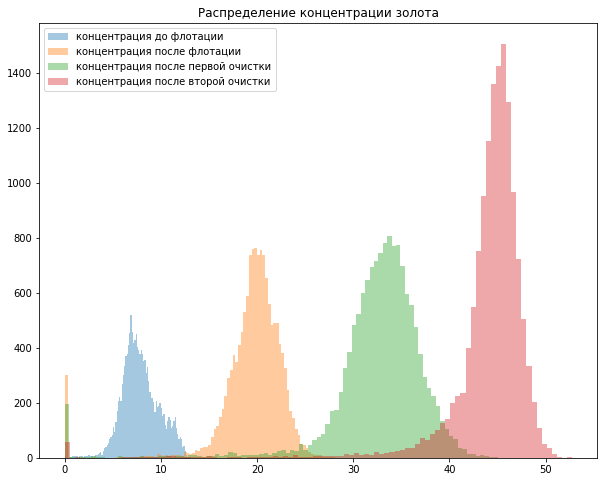

Концентрация серебра до флотации: 8.58 % 
 Концентрация серебра после флотации: 11.78 % 
 Концентрация серебра после первой очистки: 8.2 % 
 Концентрация серебра после второй очистки: 5.14 %


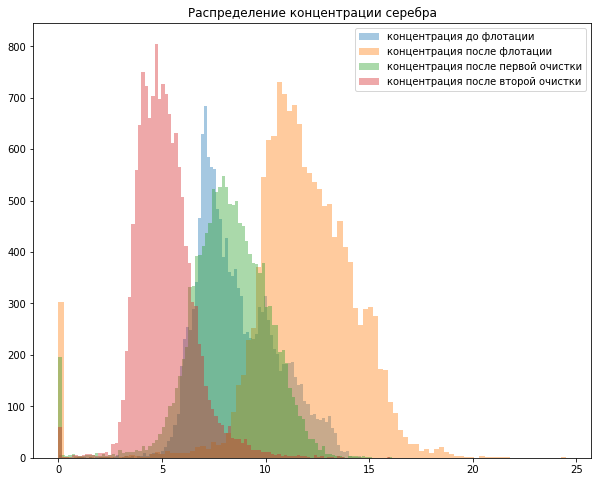

Концентрация свинца до флотации: 3.51 % 
 Концентрация свинца после флотации: 7.66 % 
 Концентрация свинца после первой очистки: 9.57 % 
 Концентрация свинца после второй очистки: 10.13 %


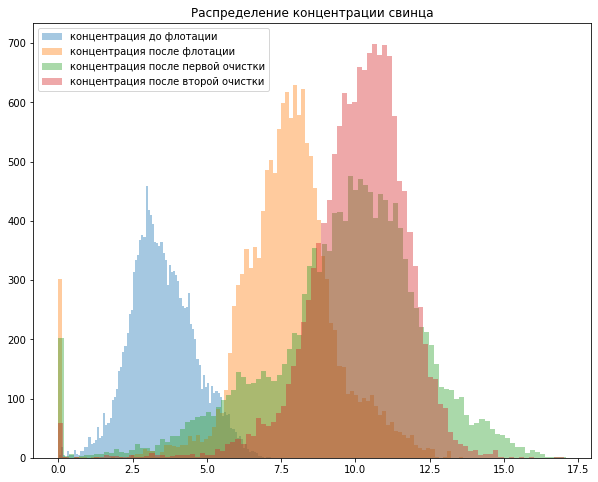

In [20]:
concentrate_level(train_data['rougher.input.feed_au'],
                  train_data['rougher.output.concentrate_au'],
                  train_data['primary_cleaner.output.concentrate_au'],
                  train_data['final.output.concentrate_au'],
                  'золота')

concentrate_level(train_data['rougher.input.feed_ag'],
                  train_data['rougher.output.concentrate_ag'],
                  train_data['primary_cleaner.output.concentrate_ag'],
                  train_data['final.output.concentrate_ag'],
                  'серебра')

concentrate_level(train_data['rougher.input.feed_pb'],
                  train_data['rougher.output.concentrate_pb'],
                  train_data['primary_cleaner.output.concentrate_pb'],
                  train_data['final.output.concentrate_pb'],
                  'свинца')

***Вывод:***

Концентрация золота и свинца с каждым этапом очистки увеличивается. Концентрация серебра после флотации увеличивается, но после очистки снижается. Для каждого металла наблюдаются выбросы в нулевом значении.

### Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

Рассмотрю, распределение азмеров гранул сырья на обучающей и тестовой выборках. Рассмотрю этапы до флотации и после флотации.

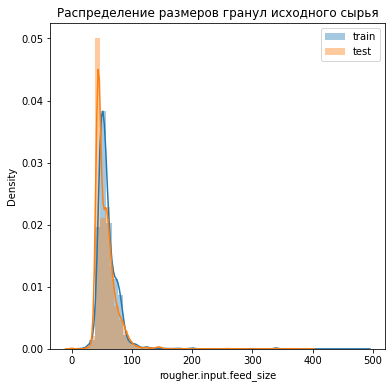

In [21]:
plt.figure(figsize=(6,6))
sns.distplot(train_data['rougher.input.feed_size'], label='train')
sns.distplot(test_data['rougher.input.feed_size'], label='test')
plt.title('Распределение размеров гранул исходного сырья')
plt.legend()
plt.show()

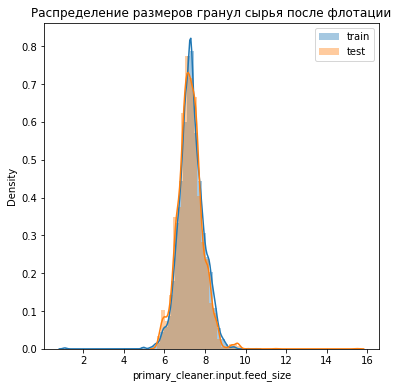

In [22]:
plt.figure(figsize=(6,6))
sns.distplot(train_data['primary_cleaner.input.feed_size'], label='train')
sns.distplot(test_data['primary_cleaner.input.feed_size'], label='test')
plt.title('Распределение размеров гранул сырья после флотации')
plt.legend()
plt.show()

***Вывод:***

Визуально распределения схожи, значительных отличий не наблюдается. Данные можно использовать для оценки модели.

### Исследование суммарной концентрации всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. 

Далее рассмотрю суммарную концентрацию всех веществ на разных стадиях.

In [23]:
feed_total = (train_data['rougher.input.feed_au'] + train_data['rougher.input.feed_ag'] 
              + train_data['rougher.input.feed_pb'] + train_data['rougher.input.feed_sol'])

rougher_total = (train_data['rougher.output.concentrate_au'] + train_data['rougher.output.concentrate_ag'] 
                 + train_data['rougher.output.concentrate_pb'] +train_data['rougher.output.concentrate_sol'])

primary_cleaner_total = (train_data['primary_cleaner.output.concentrate_au'] 
                         + train_data['primary_cleaner.output.concentrate_ag'] 
                         + train_data['primary_cleaner.output.concentrate_pb'] 
                         + train_data['primary_cleaner.output.concentrate_sol'])

final_total = (train_data['final.output.concentrate_au'] + train_data['final.output.concentrate_ag'] 
               + train_data['final.output.concentrate_pb'] + train_data['final.output.concentrate_sol'])

Суммарная концентрация веществ до флотации: 795770.46 
 Суммарная концентрация веществ после флотации: 950432.83 
 Суммарная концентрация веществ после первой очистки: 851381.35 
 Суммарная концентрация веществ после второй очистки: 967620.0


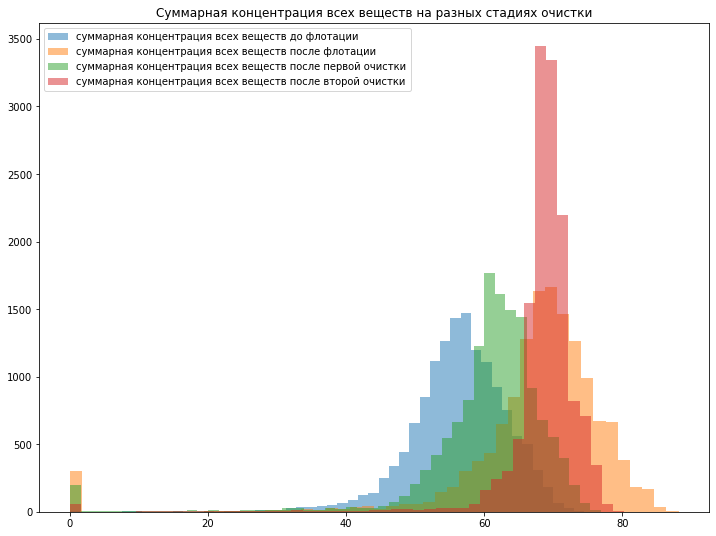

In [24]:
plt.figure(figsize = [12,9])

plt.hist(feed_total, bins = 50, alpha= 0.5, label ='суммарная концентрация всех веществ до флотации')
plt.hist(rougher_total, bins = 50, alpha= 0.5, label ='суммарная концентрация всех веществ после флотации')
plt.hist(primary_cleaner_total, bins = 50, alpha= 0.5, label ='суммарная концентрация всех веществ после первой очистки')
plt.hist(final_total, bins = 50, alpha= 0.5, label ='суммарная концентрация всех веществ после второй очистки')

plt.title('Суммарная концентрация всех веществ на разных стадиях очистки')
plt.legend()

print(f'Суммарная концентрация веществ до флотации: {round(feed_total.sum(), 2)} \n',
      f'Суммарная концентрация веществ после флотации: {round(rougher_total.sum(), 2)} \n',
      f'Суммарная концентрация веществ после первой очистки: {round(primary_cleaner_total.sum(), 2)} \n',
      f'Суммарная концентрация веществ после второй очистки: {round(final_total.sum(), 2)}') 

plt.show()

При рассмотрении концентрации всех веществ опять же видны выбросы в районе нулевых значений. Это говорит о том, что либо измерения не проводились, либо утеряны данные. Удалю из обучающей выборки значения меньше 1.

In [25]:
before_len = len(train_data)
train_data = train_data.loc[(train_data['rougher.input.feed_au'] >= 1) &
                  (train_data['rougher.input.feed_ag'] >= 1) &
                  (train_data['rougher.input.feed_pb'] >= 1) &
                  (train_data['rougher.input.feed_sol'] >= 1) &
                  (train_data['rougher.output.concentrate_au'] >= 1) &
                  (train_data['rougher.output.concentrate_ag'] >= 1) &
                  (train_data['rougher.output.concentrate_pb'] >= 1) &
                  (train_data['rougher.output.concentrate_sol'] >= 1) &
                  (train_data['primary_cleaner.output.concentrate_au'] >= 1) &
                  (train_data['primary_cleaner.output.concentrate_ag'] >= 1) &
                  (train_data['primary_cleaner.output.concentrate_pb'] >= 1) &
                  (train_data['primary_cleaner.output.concentrate_sol'] >= 1) &
                  (train_data['final.output.concentrate_au'] >= 1) &
                  (train_data['final.output.concentrate_ag'] >= 1) &
                  (train_data['final.output.concentrate_pb'] >= 1) &
                  (train_data['final.output.concentrate_sol'] >= 1)]
           
print(f'Удалено {before_len - len(train_data)} объектов')

Удалено 845 объектов


***Вывод:***

 - Суммарная концентрация всех веществ увеличивается на каждом этапе очистки.
 - Выявлены аномалии в районе нулевых значений и удалены.

## Модель

### Функция для вычисления итоговой sMAPE.

Напишу функцию для вычисления итоговой sMAPE.

In [26]:
def smape_function(target, predictions):
    return 1 / len(target) * np.sum(np.abs(target - predictions) / ((np.abs(target) + np.abs(predictions)) / 2)) * 100

In [27]:
def smape_final(smape_rougher, smape_final):
    result = (0.25 * smape_rougher + 0.75 * smape_final)
    return result

Использую для своей функции sMAPE make_scorer() из библиотеки scikit-learn.

In [28]:
smape = make_scorer(smape_function)

### Обучение разных моделей и оценка их качества кросс-валидацией. Определение лучшей модели и проверка её на тестовой выборке.

Разделю таблицы на признаки и целевые признаки. Удалю из обучающей выборки признаки, которые не содержатся в тестовой выборке.

In [29]:
train_data = train_data[test_data.columns]

features_train = train_data.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)
target_train_rougher = train_data['rougher.output.recovery']
target_train_final = train_data['final.output.recovery']

features_test = test_data.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)
target_test_rougher = test_data['rougher.output.recovery']
target_test_final = test_data['final.output.recovery']

In [30]:
display(features_train.shape)
display(target_train_rougher.shape)
display(target_train_final.shape)
display(features_test.shape)
display(target_test_rougher.shape)
display(target_test_final.shape)

(13304, 52)

(13304,)

(13304,)

(5290, 52)

(5290,)

(5290,)

Преобразую масштаб признаков методом стандартизации

In [31]:
scaler = StandardScaler()
scaler.fit(features_train)
features_train = scaler.transform(features_train)

#### Линейная регрессия

Обучу и проверю модель линейной регрессии

In [32]:
%%time 


model_lr = LinearRegression()
score_rougher_lr = cross_val_score(model_lr, features_train, target_train_rougher, cv=5, scoring=smape).mean()
score_final_lr = cross_val_score(model_lr, features_train, target_train_final, cv=5, scoring=smape).mean()
smape_final_lr = smape_final(score_rougher_lr, score_final_lr)

print(f'sMAPE обогащения чернового концентрата: {round(score_rougher_lr, 2)} %\n',
      f'sMAPE обогащения финального концентрата: {round(score_final_lr, 2)} %\n',
      f'Итоговое sMAPE: {round(smape_final_lr, 2)} %') 

sMAPE обогащения чернового концентрата: 7.28 %
 sMAPE обогащения финального концентрата: 10.68 %
 Итоговое sMAPE: 9.83 %
CPU times: user 1.38 s, sys: 1.64 s, total: 3.02 s
Wall time: 3.04 s


#### Дерево решений

In [33]:
%%time 
best_final_score_dtr = 100
best_depth_dtr = 0
for depth in range(2, 20):
    model_dtr = DecisionTreeRegressor(random_state=12345, max_depth=depth)
    score_rougher_dtr = cross_val_score(model_dtr, features_train, target_train_rougher, cv=5, scoring=smape).mean()
    score_final_dtr = cross_val_score(model_dtr, features_train, target_train_final, cv=5, scoring=smape).mean()
    smape_final_dtr = smape_final(score_rougher_dtr, score_final_dtr)
    
    if smape_final_dtr < best_final_score_dtr:
        best_final_score_dtr = smape_final_dtr
        best_depth_dtr = depth

print(f'sMAPE обогащения чернового концентрата: {round(score_rougher_dtr, 2)} %\n',
      f'sMAPE обогащения финального концентрата: {round(score_final_dtr, 2)} %\n',
      f'Итоговое sMAPE: {round(smape_final_dtr, 2)} %') 
print('Наилучшая глубина дерева:', best_depth_dtr)

sMAPE обогащения чернового концентрата: 8.66 %
 sMAPE обогащения финального концентрата: 13.74 %
 Итоговое sMAPE: 12.47 %
Наилучшая глубина дерева: 3
CPU times: user 1min 24s, sys: 485 ms, total: 1min 25s
Wall time: 1min 25s


#### Случайный лес

In [34]:
%%time 

best_final_score_rfr = 100
best_depth_rfr = 0
best_est_rfr = 0

for depth in range(1,7):
    for est in range(5, 30, 5): 
        model_rfr = RandomForestRegressor(random_state=12345, 
                                       n_estimators=est, 
                                       max_depth=depth)
        score_rougher_rfr = cross_val_score(model_rfr, features_train, target_train_rougher, cv=5, scoring=smape).mean()
        score_final_rfr = cross_val_score(model_rfr, features_train, target_train_final, cv=5, scoring=smape).mean()

        smape_final_rfr = smape_final(score_rougher_rfr, score_final_rfr)

        if smape_final_rfr < best_final_score_rfr:
            best_final_score_rfr = smape_final_rfr
            best_depth_dtr = depth
            best_est_rfr = est

print(f'sMAPE обогащения чернового концентрата: {round(score_rougher_rfr, 2)} %\n',
      f'sMAPE обогащения финального концентрата: {round(score_final_rfr, 2)} %\n',
      f'Итоговое sMAPE: {round(smape_final_rfr, 2)} %') 
print('Наилучшая глубина: ', best_depth_dtr,
     'Количество деревьев: ', best_est_rfr)

sMAPE обогащения чернового концентрата: 6.47 %
 sMAPE обогащения финального концентрата: 8.97 %
 Итоговое sMAPE: 8.35 %
Наилучшая глубина:  4 Количество деревьев:  10
CPU times: user 9min 2s, sys: 424 ms, total: 9min 2s
Wall time: 9min 3s


Лучший результат показала модель случайного леса с глубиной 4 и количеством деревьев 10. Теперь проверю лучшую модель на тестовой выборке.

#### Проверка модели на тестовой выборке

Чтобы оценить адекватность модели или проверить ее на вменяемость, необходимо сравнивайте модель со случайной. Проведу проверку модели на адекватность с помощью классификатора DummyRegressor из библиотеки sklearn. 

In [35]:
model_test = RandomForestRegressor(random_state=12345, 
                                       n_estimators=10, 
                                       max_depth=4)

model_test.fit(features_train, target_train_rougher)
predictions_r = model_test.predict(features_test)

model_test.fit(features_train, target_train_final)
predictions_f = model_test.predict(features_test)

In [36]:
smape_r = smape_function(target_test_rougher, predictions_r)
smape_f = smape_function(target_test_final, predictions_f)

print('Итоговое sMAPE на тестовой выборке:', (0.25 * smape_r + 0.75 * smape_f))

Итоговое sMAPE на тестовой выборке: 9.01363339839013


Итоговое sMAPE на обученной тестовой выборке составляет 9.01, данный результат не много ниже, чем результат лучшей модели.

#### Проверка модели на адекватность

In [37]:
dummy_regr = DummyRegressor(strategy='mean')

dummy_regr.fit(features_train, target_train_rougher)
predictions_r_dummy = dummy_regr.predict(features_test)

dummy_regr.fit(features_train, target_train_final)
predictions_f_dummy = dummy_regr.predict(features_test)

In [38]:
smape_r_dummy = smape_function(target_test_rougher, predictions_r_dummy)
smape_f_dummy = smape_function(target_test_final, predictions_f_dummy)

print('Итоговое sMAPE на константной модели', (0.25 * smape_r_dummy + 0.75 * smape_f_dummy))

Итоговое sMAPE на константной модели 9.74499284619471


Итоговое sMAPE у модели на тестовой выборке лучше, чем у константной модели.

***Вывод:***

 - Написаны функции для расчета sMAPE и итоговой sMAPE
 - Данные обучены на моделях линейной регрессии, дерева решений и случайного леса
 - Лучший результат итогового sMAPE = 8,35% показала модель случайного леса с гиперпараметрами n_estimators = 10 и max_depth = 4
 - Наилучшие результаты для предсказания rougher.output.recovery показала модель случайного леса со значением 6,53%, наихудший дерево решений со значением 8,66%
 - Наилучшие результаты для предсказания final.output.recovery показала модель случайного леса со значением 8,92%, наихудший дерево решений со значением 13,74%
 - Проверена лучшая модель на тестовой выборке и на адекватность, обученная модель работает лучше чем константная модель: ошибка обученной модели составляет 9,01%, константной - 9,74%.

## Общий вывод

В ходе создания проекта, было выполнено следующее:

- Проверены расчеты в данных
- Произведена предобработка данных, заполнены пропуски, удален аномалии
- Проведен анализ данных
   - рассмотрены изменения концентрации металлов на разных этапах очистки
   - произведено сравнение распределения размеров гранул сырья в обучающей и тестовой выборках
   - исследована суммарная концентрация всех веществ на разных стадиях очистки: в сырье, в черновом и финальном концентратах
- Написана функция для расчета симметричного среднего абсолютного процентного отклонения sMAPE
- Обучены модели линейной регрессии, дерева решений и случайного леса
- Выбрана лучшая модель с наилучшим значением итогового sMAPE, её качество проверено на тестовой выборке и модель проверена на адекватность
- Лучшей моделью является модель случайного леса с гиперпараметрами n_estimators = 10 и max_depth = 4. Ее sMAPE на обучающей выборке 8,35%, на тестовой выборке 9,01% и на константной модели 9,74%

Таким образом создана модель, которая предсказывает коэффициент восстановления золота из золотосодержащей руды и которая поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.